### LINEAR REGRESSION CASE STUDY 
  BUISNESS PROBLEM DEFINTION - one of the major automoblie company would like to design new product which can improve the sales .In order to define the product,they understanding / identify drivers for the sales ( what are the factors driving sales) and PREDICTION SALES OF DIFFERENT CAR MODELS

## IMPORT NECESSARY Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

## IMPORT DATASET

In [3]:
cars = pd.read_csv('automobile_data.csv1.csv')

### General Information About to Dataset

In [10]:
cars.head()


,manufacture,Fuel - type,body_style,wheelbase,length,width,curb-weight,horsepower,engine_size,price_in_thousands,sales_in_thousands
0,alfa-romero,gas,convertible,88.6,168.8,64.1,2548.0,111,130.0,25.0,65.0
1,alfa-romero,gas,convertible,88.6,168.8,64.1,2548.0,111,130.0,44.0,41.0
2,alfa-romero,gas,hatchback,94.5,171.2,65.5,2823.0,154,152.0,48.0,25.0
3,audi,gas,sedan,99.8,176.6,66.2,2337.0,102,109.0,28.0,36.0
4,audi,gas,sedan,99.4,176.6,66.4,2824.0,115,136.0,36.0,62.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   manufacture         205 non-null    object 
 1   Fuel - type         205 non-null    object 
 2   body_style          205 non-null    object 
 3   wheelbase           205 non-null    float64
 4   length              205 non-null    float64
 5   width               205 non-null    float64
 6   curb-weight         205 non-null    float64
 7   horsepower          205 non-null    object 
 8   engine_size         205 non-null    float64
 9   price_in_thousands  205 non-null    float64
 10  sales_in_thousands  205 non-null    float64
dtypes: float64(7), object(4)
memory usage: 17.9+ KB


In [6]:
cars.shape

(207, 11)

In [86]:
cars.rename( columns = {'Fuel - type': 'fuel_type', 'body-style':'body_style', 'wheel-base' : 'wheelbase' , 'engine size':'engine_size'} , inplace = True)

In [7]:
# no of unique value / cardinality
cars.nunique()


manufacture            22
Fuel - type             2
body_style              5
wheelbase              53
length                 75
width                  44
curb-weight           171
horsepower             60
engine_size            44
price_in_thousands     34
sales_in_thousands     41
dtype: int64

In [45]:
# in case we have huge data and we don't make the copy of the original data 
# we generally go with the option of getting columns/ varibale name for object and numeric type
# seperate categorical(object) and continuous(numeric variables)
numeric_columns = cars.select_dtypes( include = [ 'float64', 'int16'])
object_columns = cars.select_dtypes( include = [ 'object']).columns

In [49]:
cars[object_columns].head()

,manufacture,Fuel - type,body_style,horsepower
0,alfa-romero,gas,convertible,111
1,alfa-romero,gas,convertible,111
2,alfa-romero,gas,hatchback,154
3,audi,gas,sedan,102
4,audi,gas,sedan,115


In [ ]:
cars[numeric_columns].head()


In [ ]:
## alternate describe() for continuous variable
def continous_var_summary (x):
    n_tot = x.shape[0]
    nmiss = x.isna().sum()
    nmiss_perc = nmiss * 100 / n_tot
    # for outliers
    q1 = x.quantile(0.25)
    q3 = x.quantile( 0.75)
    iqr= q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 - 1.5 * iqr
    return pd.Series( [ x.dtypes, x.nunique(), n_tot, x.count(), nmiss, nmiss_perc, x.mean(), x.std(), x.var(), lc_iqr, uc_iqr, x.min(),
                       x.quantile(0.01), x.quantile(0.05), x.quantile(0.1), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.90),
                       x.quantile(0.95), x.quantile(0.99), x.max()],
    index = [ 'dtype', 'cardinality', 'n_tot', ' n', ' nmiss', 'nmiss_perc', 'mean', 'std', 'var', 'lc_iqr', 'uc_iqr', 'min', 
             'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [ ]:
numeric_columns.apply(continous_var_summary)

## treatment the outliers

In [ ]:
numeric_columns = numeric_columns.apply(lambda x : x.clip( lower = x.quantile(0.01) , upper = x.quantile(0.99)))

## there is no missing value under this ,so missing imputation will not required 
## for season , we can't simply leave the enconding as 1 = spring ,2 = summer , 3 = fall because that would imply an ordered relationship . Instead , we create dummiess

In [ ]:
cars.manufacture.nunique()

In [ ]:
pd.get_dummies(cars.manufacture , prefix = 'manufacture' , drop_first = True )

In [ ]:
## get the count of all categories of the variables
cars.manufacture.value_counts()

## in case we have categorical feature as numeric type , we have to first convert into category type

In [20]:
# get the useful variable categorical variables
object_columns = cars.loc[:, ['manufacture','body_style']]

for var in object_columns.columns:
    df_temp = pd.get_dummies(object_columns[var], prefix = var,drop_first = True)
    object_columns = pd.concat([object_columns, df_temp], axis = 1)
    object_columns.drop(columns = var , inplace = True)

## All the variables should follow the INC rules going further

In [17]:
object_columns.columns

Index(['manufacture_audi', 'manufacture_bmw', 'manufacture_chevrolet',
       'manufacture_dodge', 'manufacture_honda', 'manufacture_isuzu',
       'manufacture_jaguar', 'manufacture_mazda', 'manufacture_mercedes-benz',
       'manufacture_mercury', 'manufacture_mitsubishi', 'manufacture_nissan',
       'manufacture_peugot', 'manufacture_plymouth', 'manufacture_porsche',
       'manufacture_renault', 'manufacture_saab', 'manufacture_subaru',
       'manufacture_toyota', 'manufacture_volkswagen', 'manufacture_volvo',
       'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan',
       'body_style_wagon'],
      dtype='object')

## combine the date ( categorical and continuous variable)

In [23]:
car_new = pd.concat([numeric_columns , object_columns] , axis = 1)


In [24]:
car_new.shape

(207, 32)

## assumption check - all the variables follow the normal distribution

C:\Users\Ritik\AppData\Local\Temp\ipykernel_16940\3501389955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_new.sales_in_thousands)
C:\Users\Ritik\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


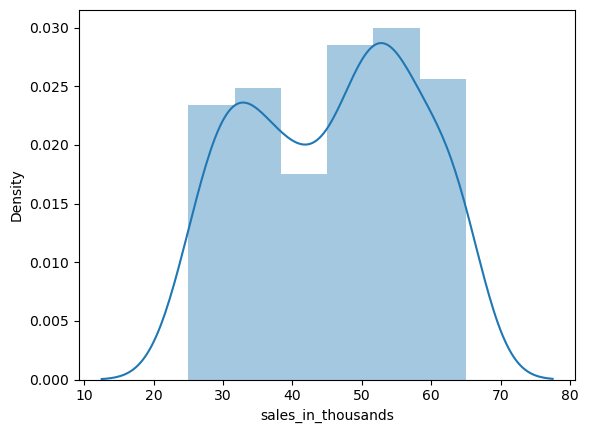

In [26]:
sns.distplot(car_new.sales_in_thousands)
plt.show()
## this distribution is highly skewed

In [28]:
car_new.sales_in_thousands.skew()

-0.10293716105954594

<Axes: >

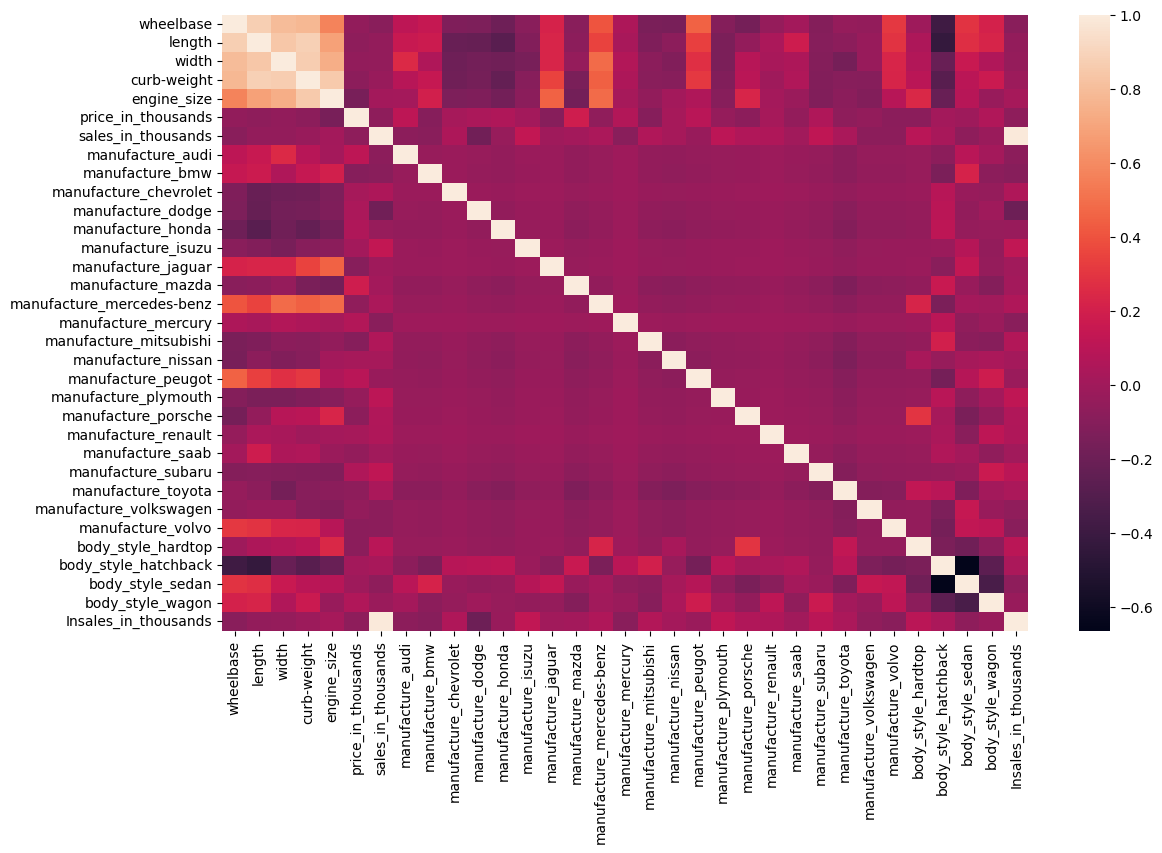

In [35]:
corrm =car_new.corr()
plt.figure (figsize = (13,8))
sns.heatmap(car_new.corr())


## split the data for modelling

In [65]:
## divide the data into training and testing 
train, test = train_test_split(car_new, test_size = 0.3 , random_state = 12345)

In [39]:
train.shape

(144, 33)

In [40]:
test.shape

(63, 33)

# building a linear regression model

In [110]:
m1_equation = '''sales_in_thousands~ manufacture_bmw + price_in_thousands + length + wheelbase  '''

In [112]:
lm0 =smf.ols(m1_equation , train ).fit()

In [113]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:     sales_in_thousands   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.100
Date:                Sat, 08 Jun 2024   Prob (F-statistic):              0.359
Time:                        17:29:03   Log-Likelihood:                -552.91
No. Observations:                 142   AIC:                             1116.
Df Residuals:                     137   BIC:                             1131.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [114]:
## Due to strong multicollinearity the prediction is failed , we need to figure more accuarte x variables to analayis this model 